In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.regression import corrplot
sn.set_style('whitegrid')
%matplotlib inline

ImportError: cannot import name 'corrplot' from 'seaborn.regression' (C:\Users\dhruv\Downloads\ana\lib\site-packages\seaborn\regression.py)

In [6]:
import pandas_datareader.data as web

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
tech_list  = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end= datetime.now()

In [11]:
start = datetime(end.year-1,end.month,end.day)

In [12]:
for stock in tech_list:
       globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [13]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,89.874219,87.340563,88.589061,88.679881,1.522524e+08,88.039351
std,20.735652,19.981564,20.551273,20.329044,7.419484e+07,20.678364
min,57.125000,53.152500,57.020000,56.092499,2.880380e+07,55.291519
25%,72.062500,70.307503,71.172501,71.762497,1.052076e+08,70.737755
50%,81.059998,79.687500,80.592499,80.462502,1.354452e+08,79.622337
75%,112.482498,109.107498,111.059998,111.112503,1.846420e+08,110.921135
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


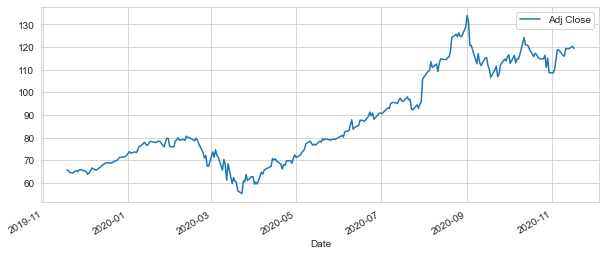

In [60]:
AAPL['Adj Close'].plot(legend=True,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

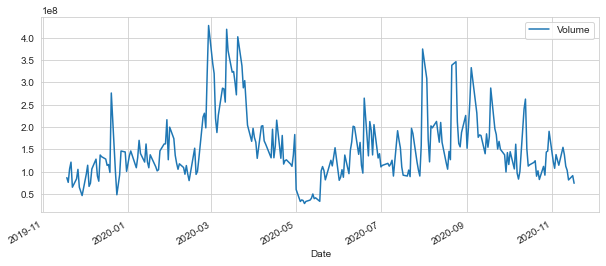

In [15]:
AAPL['Volume'].plot(legend=True,figsize = (10,4))

In [16]:
ma_day = [10,20,50]

In [17]:
for ma in ma_day:
    column_name = "MA for %s day" %(str(ma))
    
    APPL[column_name] = pd.rolling_mean(APPL['AdjClose'],ma)


AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

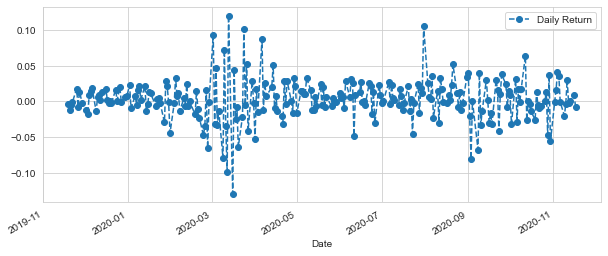

In [19]:
AAPL['Daily Return'].plot(figsize=(10,4),legend = True,linestyle = '--',marker='o')

C:\Users\dhruv\Downloads\ana\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

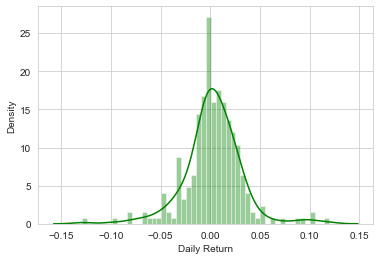

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='green')

<AxesSubplot:>

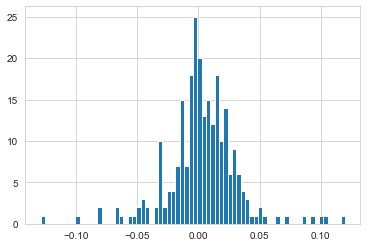

In [32]:
AAPL['Daily Return'].hist(bins=70)

In [35]:
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [36]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-18,65.665634,1320.699951,148.647720,1752.530029
2019-11-19,65.466507,1315.459961,148.697144,1752.790039
2019-11-20,64.704376,1303.050049,148.439194,1745.530029
2019-11-21,64.414268,1301.349976,148.300293,1734.709961
2019-11-22,64.357727,1295.339966,148.409439,1745.719971


In [37]:
tech_rets = closing_df.pct_change()

In [38]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-18,NaN,NaN,NaN,NaN
2019-11-19,-0.003032,-0.003968,0.000332,0.000148
2019-11-20,-0.011642,-0.009434,-0.001735,-0.004142
2019-11-21,-0.004484,-0.001305,-0.000936,-0.006199
2019-11-22,-0.000878,-0.004618,0.000736,0.006347


C:\Users\dhruv\Downloads\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


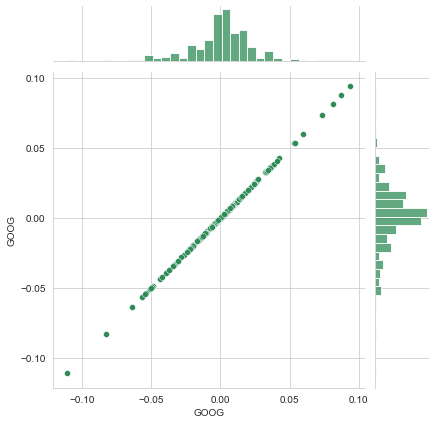

In [42]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color = 'seagreen')

C:\Users\dhruv\Downloads\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


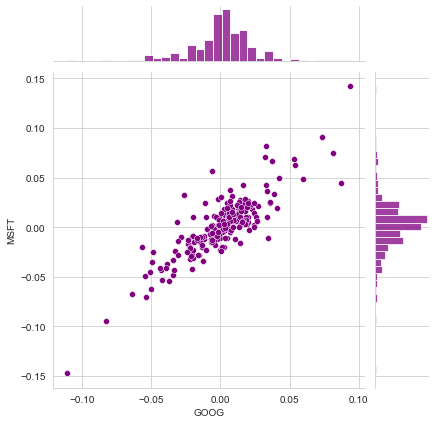

In [44]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color = 'purple')

In [45]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-18,NaN,NaN,NaN,NaN
2019-11-19,-0.003032,-0.003968,0.000332,0.000148
2019-11-20,-0.011642,-0.009434,-0.001735,-0.004142
2019-11-21,-0.004484,-0.001305,-0.000936,-0.006199
2019-11-22,-0.000878,-0.004618,0.000736,0.006347


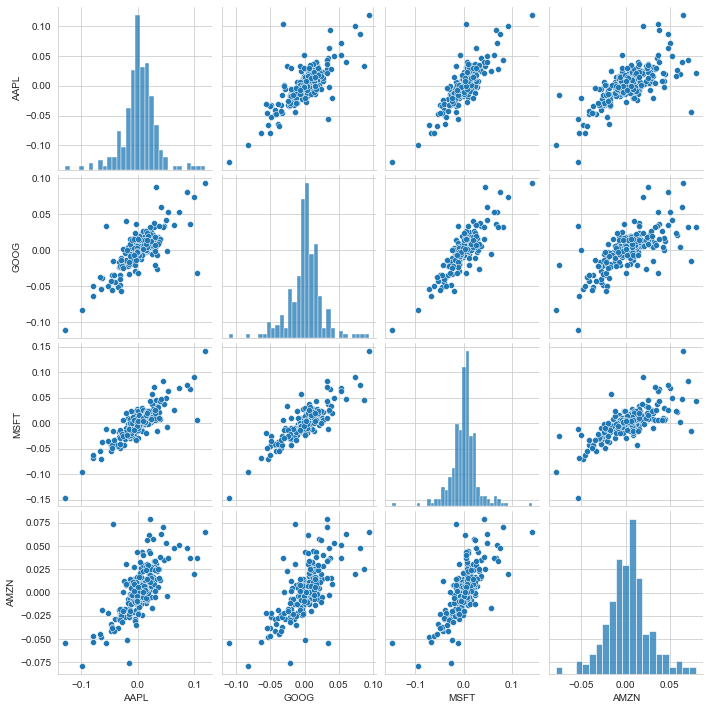

In [47]:
sns.pairplot(tech_rets.dropna())

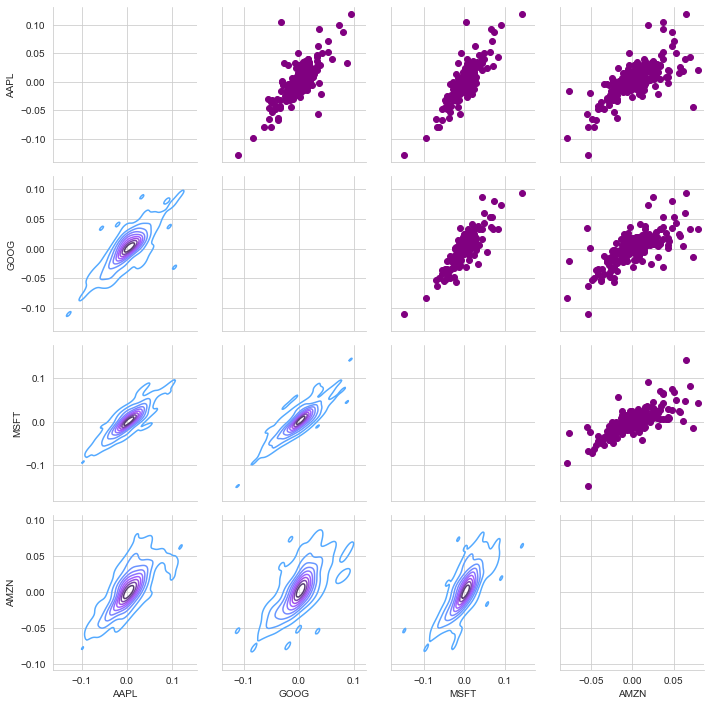

In [61]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=50)

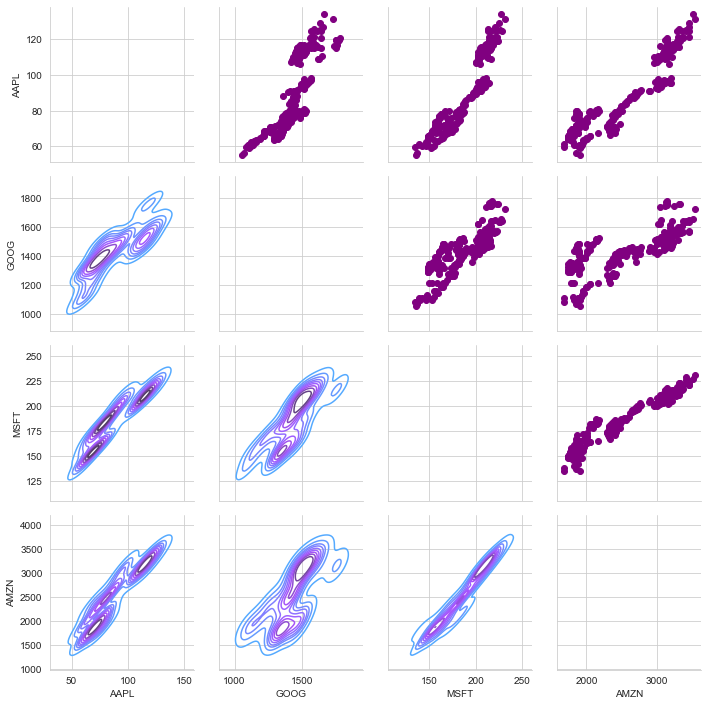

In [64]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=50)

In [73]:
rets = tech_rets.dropna()

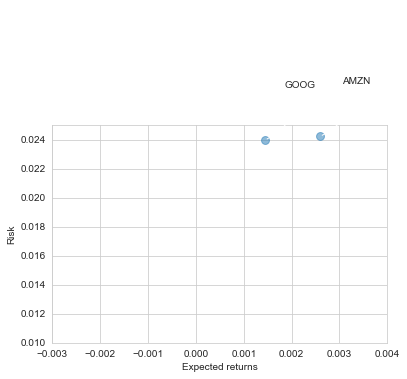

In [83]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))